In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([Dense(32, activation='relu', input_shape=(10,)), Dense(32, activation='relu'), Dense(1, activation='sigmoid')])

In [17]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 15ms/step - loss: 0.6804 - accuracy: 0.6683 - val_loss: 0.6803 - val_accuracy: 0.6347
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6747 - accuracy: 0.7065 - val_loss: 0.6753 - val_accuracy: 0.6210
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.6859 - val_loss: 0.6713 - val_accuracy: 0.6347
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.7358 - val_loss: 0.6678 - val_accuracy: 0.6575
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.7309 - val_loss: 0.6641 - val_accuracy: 0.6758
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.7642 - val_loss: 0.6604 - val_accuracy: 0.6758
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.7691 - val_loss: 0.6565 - val_accuracy: 0.7078
Epoch 8/100


In [19]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.8813


0.8812785148620605

In [21]:
import matplotlib.pylab as plt
%matplotlib inline

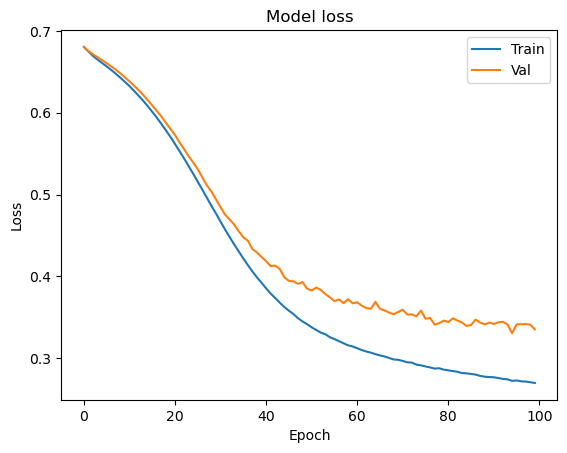

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

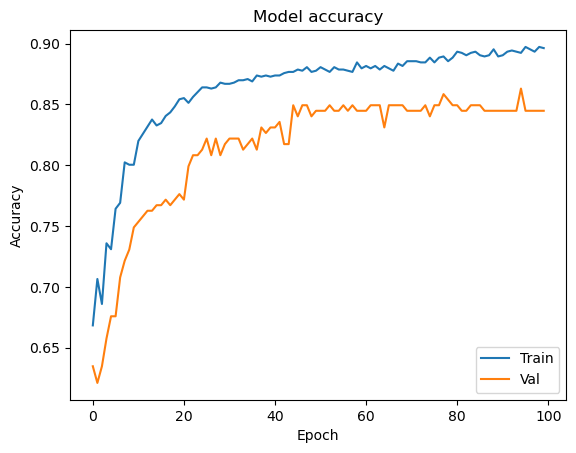

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 26ms/step - loss: 0.4319 - accuracy: 0.8141 - val_loss: 0.3776 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 1s 19ms/step - loss: 0.3095 - accuracy: 0.8836 - val_loss: 0.3595 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2749 - accuracy: 0.8885 - val_loss: 0.3271 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2881 - accuracy: 0.8806 - val_loss: 0.2999 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2540 - accuracy: 0.8865 - val_loss: 0.3131 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2569 - accuracy: 0.9041 - val_loss: 0.2953 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 1s 24ms/step - loss: 0.2483 - accuracy: 0.8973 - val_loss: 0.3010 - val_accuracy: 0.8950
Epoch 

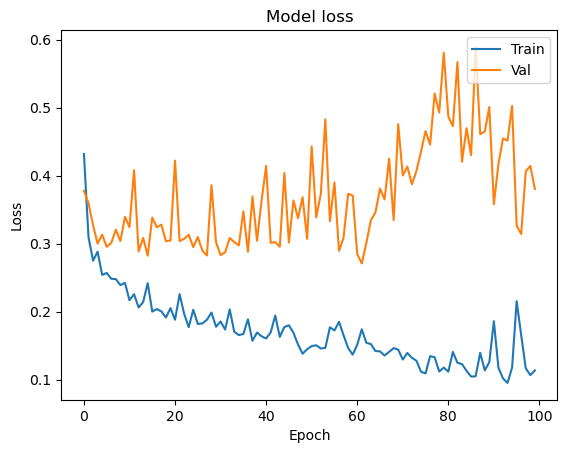

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

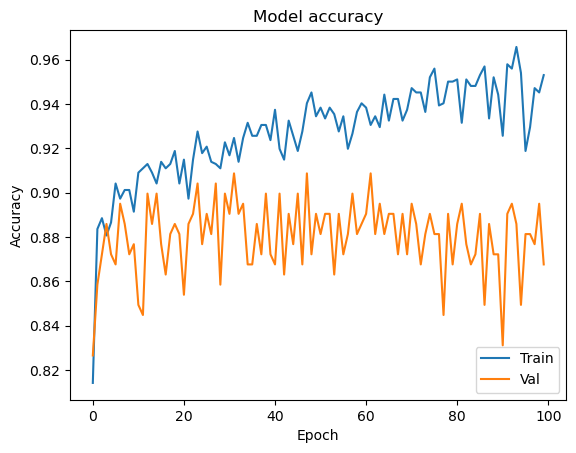

In [28]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
from keras.layers import Dropout
from keras import regularizers

In [32]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [34]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 35ms/step - loss: 14.2214 - accuracy: 0.5822 - val_loss: 3.9062 - val_accuracy: 0.7443
Epoch 2/100
32/32 [==============================] - 1s 23ms/step - loss: 1.6956 - accuracy: 0.8102 - val_loss: 0.6894 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.5528 - accuracy: 0.8816 - val_loss: 0.7094 - val_accuracy: 0.7489
Epoch 4/100
32/32 [==============================] - 1s 28ms/step - loss: 0.5216 - accuracy: 0.8571 - val_loss: 0.5161 - val_accuracy: 0.8539
Epoch 5/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4732 - accuracy: 0.8826 - val_loss: 0.4921 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4837 - accuracy: 0.8748 - val_loss: 0.5064 - val_accuracy: 0.8493
Epoch 7/100
32/32 [==============================] - 1s 27ms/step - loss: 0.4817 - accuracy: 0.8699 - val_loss: 0.4987 - val_accuracy: 0.8630
Epoch

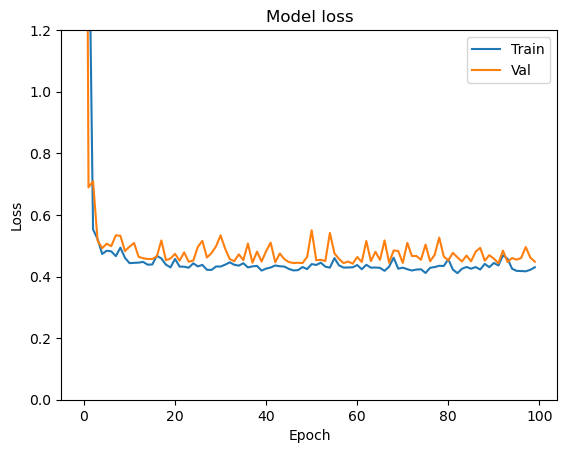

In [35]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

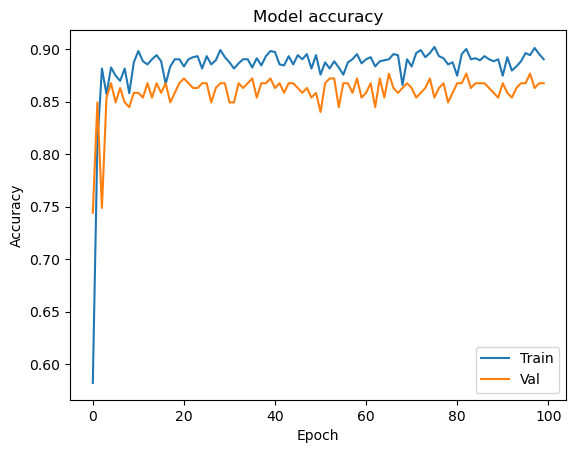

In [37]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()